In this notebook, we simulate brown noise, a stationary oscillator, and the two together using the simulation library, `sim`, in `neurodsp`.

In [1]:
import numpy as np
np.random.seed(0)

import neurodsp
from neurodsp import spectral

%matplotlib inline
import matplotlib.pyplot as plt

# Simulate brown noise
Often, we want to simulate noise that is comparable to what we see in neural recordings. Brown noise is a good proxy for that because, like neural signals, power decreases roughly linearly with frequency.

Text(0,0.5,'Power')

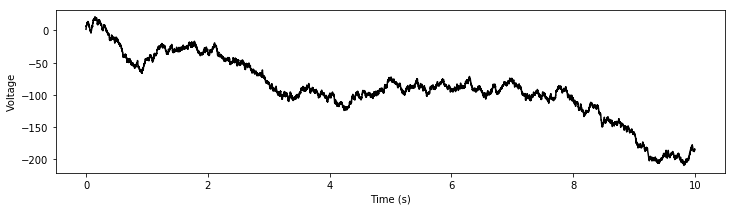

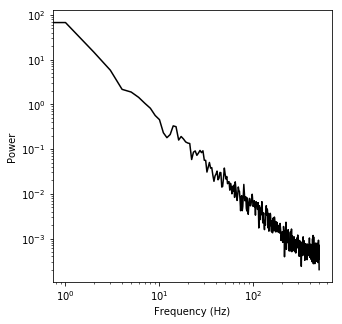

In [2]:
# Simulate brown noise
N_seconds = 10
Fs = 1000
t = np.arange(0, N_seconds, 1/Fs)
brown = neurodsp.sim_brown_noise(N_seconds*Fs)

# Plot time series
plt.figure(figsize=(12,3))
plt.plot(t, brown, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

# Plot power spectrum
f, psd = spectral.psd(brown, Fs)
plt.figure(figsize=(5,5))
plt.loglog(f, psd, 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Simulate filtered brown noise
However, brown noise has a lot of power in very slow frequnecies, whereas these slow frequencies are often not present or filtered out in neural signals. Therefore, we may desire our brown noise to be high-pass filtered.

Note this might not be ideal because it somewhat creates an oscillation at the cutoff frequency

NOTE: Increased high-pass filter order by 1 in order to be odd


Text(0,0.5,'Power')

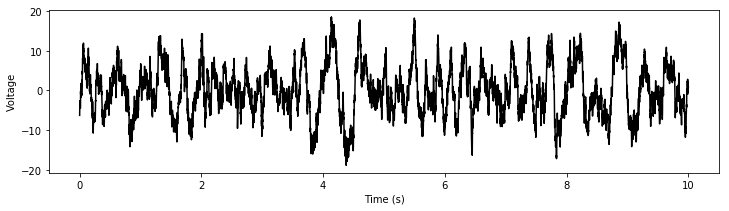

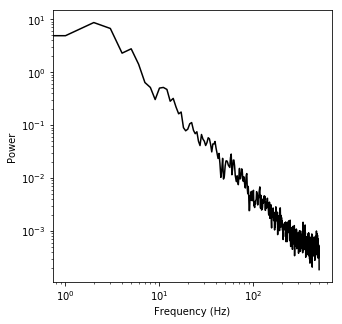

In [3]:
# Simulate highpass-filtered brown noise with a 1Hz cutoff frequency, and a filter of length 3 seconds
f_hipass_brown = 1
filter_length = int(Fs * 3)
brown_filt = neurodsp.sim_filtered_brown_noise(N_seconds, Fs, (f_hipass_brown, None), filter_length)

# Plot time series
plt.figure(figsize=(12,3))
plt.plot(t, brown_filt, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

# Plot power spectrum
f, psd = spectral.psd(brown_filt, Fs)
plt.figure(figsize=(5,5))
plt.loglog(f, psd, 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Simulate an oscillator
In addition to noise, you may also want to simulate an oscillatory process. We can do that with neurodsp, with arbitrary rise-decay symmetry.

Text(0,0.5,'Power')

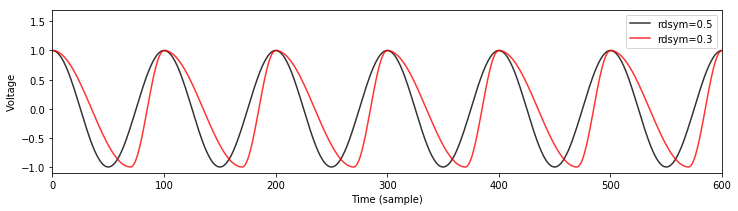

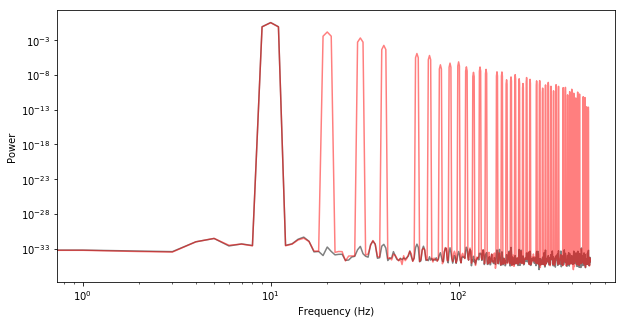

In [4]:
# Simulate symmetric oscillator
N_samples_cycle = 100
N_cycles = 100
oscA = neurodsp.sim_oscillator(N_samples_cycle, N_cycles, rdsym=.5)
oscB = neurodsp.sim_oscillator(N_samples_cycle, N_cycles, rdsym=.3)

# Plot time series
plt.figure(figsize=(12,3))
plt.plot(oscA, 'k', label='rdsym='+str(.5), alpha=.8)
plt.plot(oscB, 'r', label='rdsym='+str(.3), alpha=.8)
plt.ylim((-1.1, 1.7))
plt.xlim((0,600))
plt.legend()
plt.xlabel('Time (sample)')
plt.ylabel('Voltage')

# Plot power spectrum
fA, psdA = spectral.psd(oscA, 1000)
fB, psdB = spectral.psd(oscB, 1000)
plt.figure(figsize=(10,5))
plt.loglog(fA, psdA, 'k', alpha=.5)
plt.loglog(fB, psdB, 'r', alpha=.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Simulate a noisy oscillator
In order to simulate a signal that looks more like a brain signal, you may want to simulate both an oscillation and noise. We can also do this with neurodsp, with control over the power ratio between oscillation and noise

Text(0,0.5,'Power')

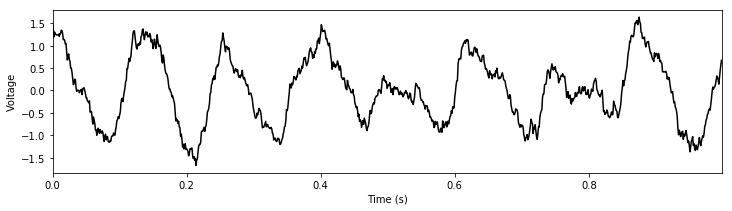

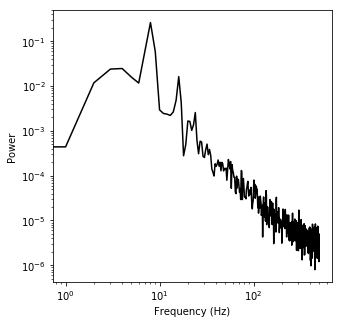

In [5]:
freq = 8
T = 5
Fs = 1000
rdsym = .3
f_hipass_brown = 2
SNR = 3
t = np.arange(0, T, 1/Fs)
signal = neurodsp.sim_noisy_oscillator(freq, T, Fs, rdsym=rdsym,
                                       f_hipass_brown=f_hipass_brown, SNR=SNR)

plt.figure(figsize=(12,3))
samps_plot = np.arange(1000)
plt.plot(t[samps_plot], signal[samps_plot], 'k')
plt.xlim((0,t[samps_plot[-1]]))
plt.xlabel('Time (s)')
plt.ylabel('Voltage')

# Plot power spectrum
f, psd = spectral.psd(signal, Fs)
plt.figure(figsize=(5,5))
plt.loglog(f, psd, 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')